In [62]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import random


In [101]:
class elementary_ca:

    def __init__(self, rule_num, num_cells):
        assert(rule_num > 0 and rule_num < 256)
        rule_string = np.binary_repr(rule_num, 8)
        self.rule = np.array([int(bit) for bit in rule_string])
        print("Rule number chosen: " + str(rule_num) + " ")
        print(self.rule)
        self.num_cells = num_cells

    def make_initial_config(self, percent_ones, percent_zeros):
        dec_ones = percent_ones / 100
        num_ones = math.ceil(dec_ones * self.num_cells)
        num_zeros = self.num_cells - num_ones
        ones_left = num_ones
        zeros_left = num_zeros
        configuration = []
        for i in range(self.num_cells):
            if (ones_left > 0 and zeros_left > 0):
                x = random.randint(0,1)
                configuration.append(x)
                if x == 1:
                    ones_left -= 1
                elif x == 0:
                    zeros_left -= 1
            elif (ones_left > 0):
                configuration.append(1)
                ones_left -= 1
            elif (zeros_left > 0):
                configuration.append(0)
                zeros_left -= 1
        
        return configuration

    def rule_index(self, triplet):
        L, C, R = triplet
        index = 7 - (4*L + 2*C + R)
        return int(index)
    
    def get_rule(self):
        return self.rule
    
    def update_rule(self, new_rule):
        self.rule = new_rule
    
    def noise(self, probability):
        x = random.randrange(0, (len(self.rule)), 1)
        y = random.random()
        if(y < probability):
            if (self.rule[x] == 0):
                self.rule[x] = 1
            else:
                self.rule[x] = 0
        

    def CA_run(self, initial_state, n_steps, noise):
        m_cells = len(initial_state)
        CA_run = np.zeros((n_steps, m_cells))
        CA_run[0, :] = initial_state

        for step in range(1, n_steps):
            #if noise, mutate the rule else do all_triplets
            if noise:
                self.noise(0.5)
                
            all_triplets = np.stack(
                [
                    np.roll(CA_run[step - 1, :], 1),
                    CA_run[step - 1, :],
                    np.roll(CA_run[step - 1, :], -1),
                ]
            )
            CA_run[step, :] = self.rule[np.apply_along_axis(self.rule_index, 0, all_triplets)]

        return CA_run
    




Rule number chosen: 184 
[1 0 1 1 1 0 0 0]
Initial configuration: 


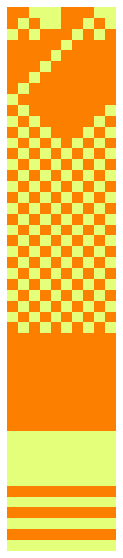

In [136]:
ECA = elementary_ca(184, 10)
init_config = ECA.make_initial_config(50, 50)
print("Initial configuration: ")
data = ECA.CA_run(init_config, 50, noise=False)
noisydata = ECA.CA_run(init_config, 50, noise=True)
fig = plt.figure(figsize=(50, 10)) # <- may need to change sizes to visualize large T (i.e., scaled version of numcell x time)
ax = plt.axes()
ax.set_axis_off()
ax.imshow(data, interpolation='none',cmap='Wistia', aspect=1)
ax2 = plt.axes()
ax2.set_axis_off()
ax2.imshow(noisydata, interpolation='none', cmap='Wistia', aspect=1)